In [ ]:
!pip install pandas-datareader

In [ ]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

start = dt.datetime(2018,1,1)

end = dt.datetime.now()

print(start)
print(end)


2018-01-01 00:00:00
2024-07-22 06:09:23.553316


In [ ]:
stock =['TSLA']
data = pdr.DataReader(stock,'stooq',str(start.date()),str(end.date())).stack('Symbols')
data.head()


,Attributes,Close,High,Low,Open,Volume
Date,Symbols,,,,,
2024-07-19,TSLA,239.20,249.44,236.8300,247.79,87403903
2024-07-18,TSLA,249.23,257.14,247.2000,251.09,110869037
2024-07-17,TSLA,248.50,258.47,246.1820,252.73,115584810
2024-07-16,TSLA,256.56,258.62,245.8001,255.31,126332470
2024-07-15,TSLA,252.64,265.60,251.7300,255.97,146912920


In [ ]:
newData = data.reset_index()
newData.head()



Attributes,Date,Symbols,Close,High,Low,Open,Volume
0,2024-07-19,TSLA,239.20,249.44,236.8300,247.79,87403903
1,2024-07-18,TSLA,249.23,257.14,247.2000,251.09,110869037
2,2024-07-17,TSLA,248.50,258.47,246.1820,252.73,115584810
3,2024-07-16,TSLA,256.56,258.62,245.8001,255.31,126332470
4,2024-07-15,TSLA,252.64,265.60,251.7300,255.97,146912920


In [ ]:
newData.to_csv('Tesla_Stock_2018to_2024')

In [ ]:
import matplotlib.pyplot as plt
# plot the close price fo the tesla stock
# load the csv file
Tsla_data = pd.read_csv('/content/Tesla_Stock_2018to_2024')

# set the date as the index
Tsla_data.set_index('Date',inplace=True)
# sort the data into ascending order wrt dates
Tsla_data.sort_index(ascending=True,inplace=True)


# and then sperate the close price
close_price = Tsla_data['Close']
# then plot the close price
Tsla_data.head()



,Unnamed: 0,Symbols,Close,High,Low,Open,Volume
Date,,,,,,,
2018-01-02,1646,TSLA,21.3687,21.4740,20.7333,20.8000,65188275
2018-01-03,1645,TSLA,21.1500,21.6833,21.0367,21.4000,66893295
2018-01-04,1644,TSLA,20.9747,21.2367,20.3787,20.8580,149194260
2018-01-05,1643,TSLA,21.1053,21.1493,20.8000,21.1080,68838660
2018-01-08,1642,TSLA,22.4273,22.4680,21.0333,21.0667,147555480


,Unnamed: 0,Symbols,Close,High,Low,Open,Volume
Date,,,,,,,
2018-01-02,1646,TSLA,21.3687,21.4740,20.7333,20.8000,65188275
2018-01-03,1645,TSLA,21.1500,21.6833,21.0367,21.4000,66893295
2018-01-04,1644,TSLA,20.9747,21.2367,20.3787,20.8580,149194260
2018-01-05,1643,TSLA,21.1053,21.1493,20.8000,21.1080,68838660
2018-01-08,1642,TSLA,22.4273,22.4680,21.0333,21.0667,147555480


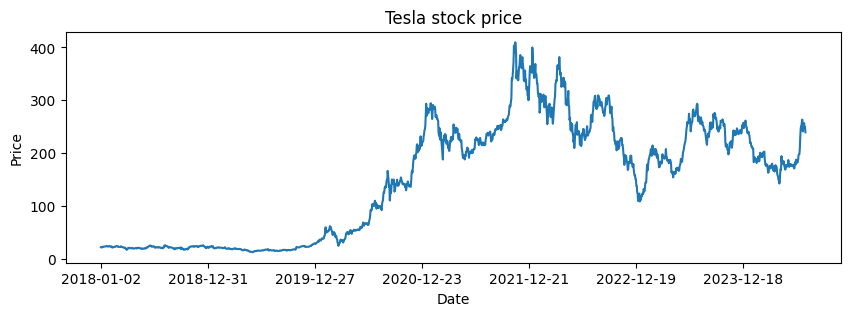

In [ ]:
import matplotlib.pyplot as plt
# plot the close price fo the tesla stock
# load the csv file
Tsla_data = pd.read_csv('/content/Tesla_Stock_2018to_2024')

# set the date as the index
Tsla_data.set_index('Date',inplace=True)
# sort the data into ascending order wrt dates
Tsla_data.sort_index(ascending=True,inplace=True)


# and then sperate the close price
close_price = Tsla_data['Close']
# then plot the close price
close_price.plot(xlabel='Date',ylabel='Price',label='Tsla',title=
                'Tesla stock price',figsize=(10,3))

Tsla_data.head()

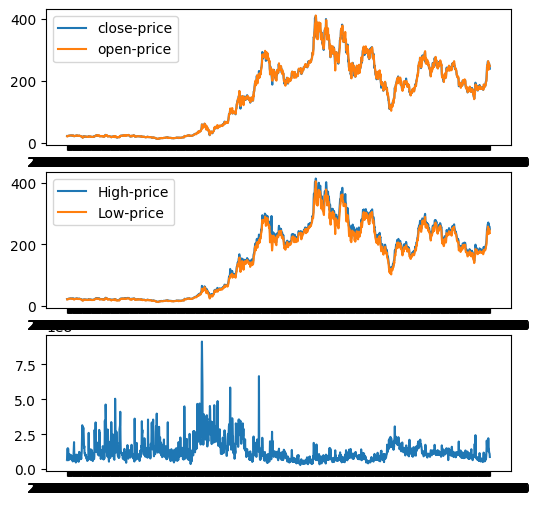

In [ ]:
plt.figure(2,(6,6))
plt.subplot(3,1,1)
plt.plot(Tsla_data['Close'],label='close-price')
plt.plot(Tsla_data['Open'],label='open-price')
plt.legend()

plt.subplot(3,1,2)
plt.plot(Tsla_data['High'],label='High-price')
plt.plot(Tsla_data['Low'],label='Low-price')
plt.legend()
plt.subplot(3,1,3)
plt.plot(Tsla_data['Volume'],label='Volumne')



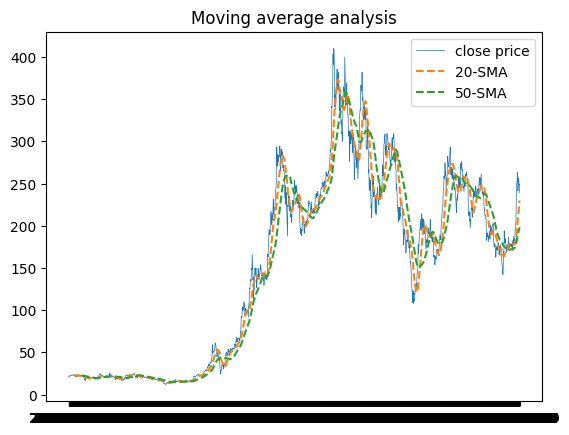

In [ ]:
# calulate the moving average
Tsla_data['SMA_20'] = Tsla_data['Close'].rolling(20).mean()
Tsla_data['SMA_50'] = Tsla_data['Close'].rolling(50).mean()
plt.figure(1)
plt.plot(Tsla_data['Close'],label='close price',linewidth=0.5)
plt.plot(Tsla_data['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(Tsla_data['SMA_50'],label='50-SMA',linestyle='--')

plt.title('Moving average analysis')
plt.legend()




In [ ]:
!pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=11f5997492f9d34bc5fb141f5b1c8c9a969b2edf2f93999e4987db2cee4c0a55
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


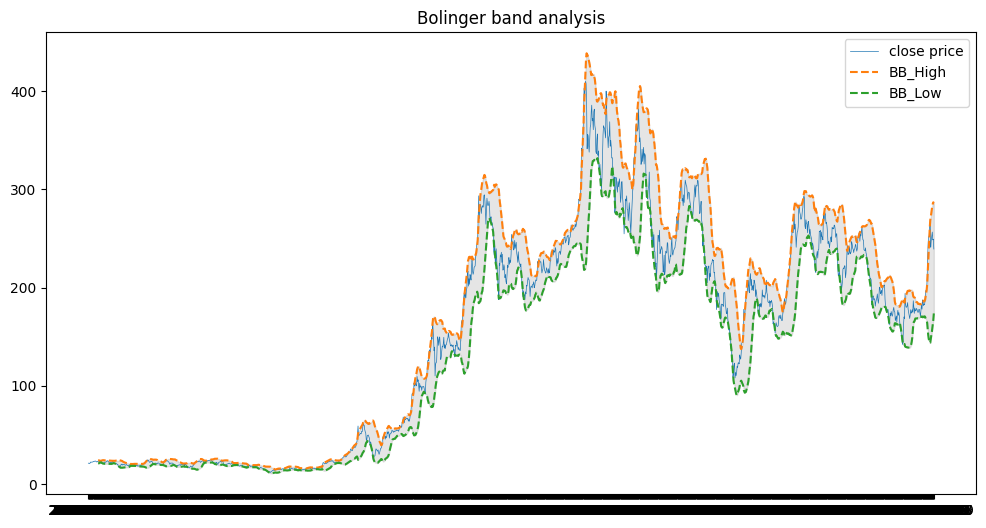

In [ ]:
import ta
# bollinger band
bb = ta.volatility.BollingerBands(Tsla_data['Close'],window=20,window_dev=2)

Tsla_data['BB_High']=bb.bollinger_hband()
Tsla_data['BB_Low']=bb.bollinger_lband()
plt.figure(1,(12,6))
plt.plot(Tsla_data['Close'],label='close price',linewidth=0.5)
plt.plot(Tsla_data['BB_High'],label='BB_High',linestyle='--')
plt.plot(Tsla_data['BB_Low'],label='BB_Low',linestyle='--')
plt.fill_between(Tsla_data.index,Tsla_data['BB_High'],
                 Tsla_data['BB_Low'],color = 'gray',alpha=0.2)
plt.title('Bolinger band analysis')
plt.legend()

# if the descreasing morality preceding a period of low modelit

# if the increasing morality preceding a period of high model it

# if the blue bond touch the higher bound then it will come low

# if the blue bond touch the lower bound the price come to high



In [ ]:
# relative strength index

#the rsi is a moment ocilator that magers the speed and change of prize moments it range from 0 to 100 with a value above the 70 indicate overbought condition and the value below 30 over sold condition

# relative strength index


,Unnamed: 0,Symbols,Close,High,Low,Open,Volume,SMA_20,SMA_50,BB_High,BB_Low,RSI
Date,,,,,,,,,,,,
2024-07-15,4,TSLA,252.64,265.60,251.7300,255.97,146912920,216.7975,192.8150,279.557930,154.037070,70.754312
2024-07-16,3,TSLA,256.56,258.62,245.8001,255.31,126332470,220.7250,194.3460,283.114805,158.335195,72.021860
2024-07-17,2,TSLA,248.50,258.47,246.1820,252.73,115584810,223.7780,195.6922,285.324052,162.231948,65.715167
2024-07-18,1,TSLA,249.23,257.14,247.2000,251.09,110869037,226.9965,196.9816,286.772082,167.220918,66.005515
2024-07-19,0,TSLA,239.20,249.44,236.8300,247.79,87403903,229.8780,198.2094,286.065007,173.690993,58.655507


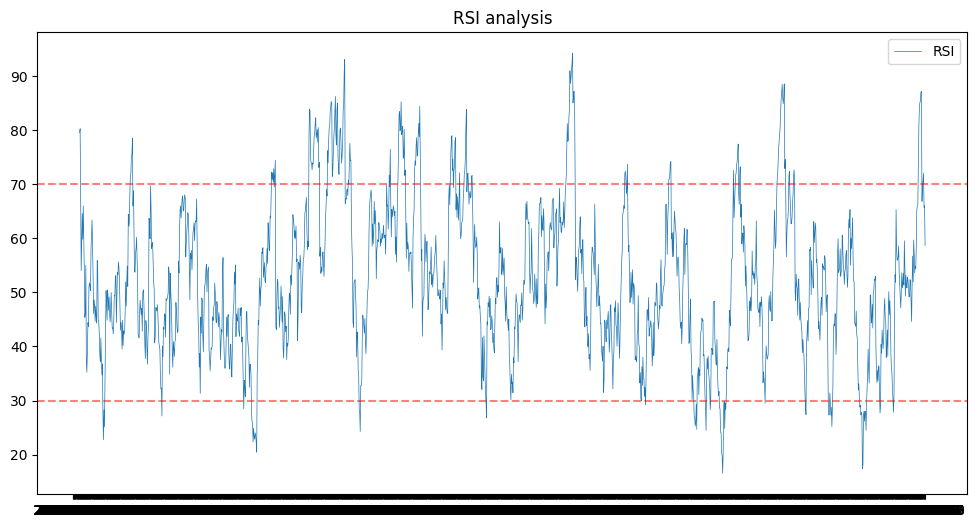

In [ ]:
# relative strength index
Tsla_data['RSI'] = ta.momentum.rsi(Tsla_data['Close'],window=14)

plt.figure(1,(12,6))
plt.plot(Tsla_data['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(30,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend()
Tsla_data.tail()

In [ ]:
Tsla_data.to_csv('newTesla_Stock_Price_2018_to_2024_indicator.csv')

### INFOSIS




In [ ]:
stock =['INFY']
data = pdr.DataReader(stock,'stooq',str(start.date()),str(end.date())).stack('Symbols')
data.head()


,Attributes,Close,High,Low,Open,Volume
Date,Symbols,,,,,
2024-07-19,INFY,21.68,21.87,21.31,21.31,16443577.0
2024-07-18,INFY,22.25,22.61,21.52,21.66,42176088.0
2024-07-17,INFY,20.53,20.68,20.46,20.54,14389190.0
2024-07-16,INFY,20.66,20.66,20.47,20.51,7137487.0
2024-07-15,INFY,20.31,20.41,20.17,20.17,11641712.0


In [ ]:
newData = data.reset_index()
newData.head()



Attributes,Date,Symbols,Close,High,Low,Open,Volume
0,2024-07-19,INFY,21.68,21.87,21.31,21.31,16443577.0
1,2024-07-18,INFY,22.25,22.61,21.52,21.66,42176088.0
2,2024-07-17,INFY,20.53,20.68,20.46,20.54,14389190.0
3,2024-07-16,INFY,20.66,20.66,20.47,20.51,7137487.0
4,2024-07-15,INFY,20.31,20.41,20.17,20.17,11641712.0


In [ ]:
newData.to_csv('infosis_Stock_2018to_2024')

In [ ]:
import matplotlib.pyplot as plt
# plot the close price fo the tesla stock
# load the csv file
INFO_data = pd.read_csv('/content/infosis_Stock_2018to_2024')

# set the date as the index
INFO_data.set_index('Date',inplace=True)
# sort the data into ascending order wrt dates
Tsla_data.sort_index(ascending=True,inplace=True)


# and then sperate the close price
close_price = Tsla_data['Close']
# then plot the close price
INFO_data.head()



,Unnamed: 0,Symbols,Close,High,Low,Open,Volume
Date,,,,,,,
2024-07-19,0,INFY,21.68,21.87,21.31,21.31,16443577.0
2024-07-18,1,INFY,22.25,22.61,21.52,21.66,42176088.0
2024-07-17,2,INFY,20.53,20.68,20.46,20.54,14389190.0
2024-07-16,3,INFY,20.66,20.66,20.47,20.51,7137487.0
2024-07-15,4,INFY,20.31,20.41,20.17,20.17,11641712.0


,Unnamed: 0,Symbols,Close,High,Low,Open,Volume,RSI
Date,,,,,,,,
2018-01-02,1646,INFY,7.24550,7.28987,7.21909,7.23676,1.382488e+07,NaN
2018-01-03,1645,INFY,7.18336,7.23676,7.16087,7.22341,1.152342e+07,NaN
2018-01-04,1644,INFY,7.13869,7.20563,7.12544,7.20563,1.829198e+07,NaN
2018-01-05,1643,INFY,7.27210,7.28556,7.18336,7.19209,1.102944e+07,NaN
2018-01-08,1642,INFY,7.33012,7.34789,7.26778,7.28556,1.258842e+07,NaN


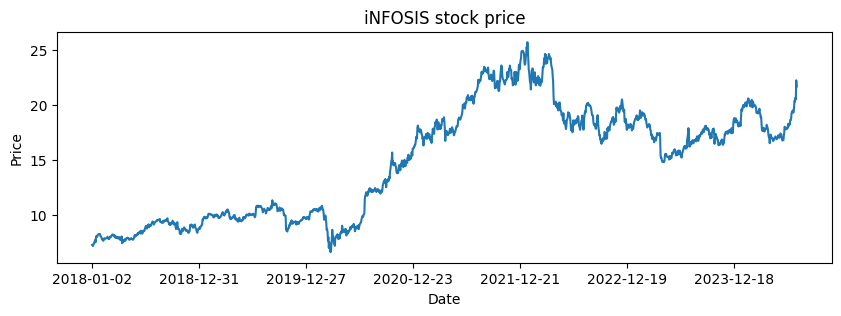

In [ ]:
import matplotlib.pyplot as plt
# plot the close price fo the tesla stock
# load the csv file
INFO_data = pd.read_csv('/content/infosis_Stock_2018to_2024')

# set the date as the index
INFO_data.set_index('Date',inplace=True)
# sort the data into ascending order wrt dates
INFO_data.sort_index(ascending=True,inplace=True)


# and then sperate the close price
close_price = INFO_data['Close']
# then plot the close price
close_price.plot(xlabel='Date',ylabel='Price',label='Tsla',title=
                'iNFOSIS stock price',figsize=(10,3))

Tsla_data.head()

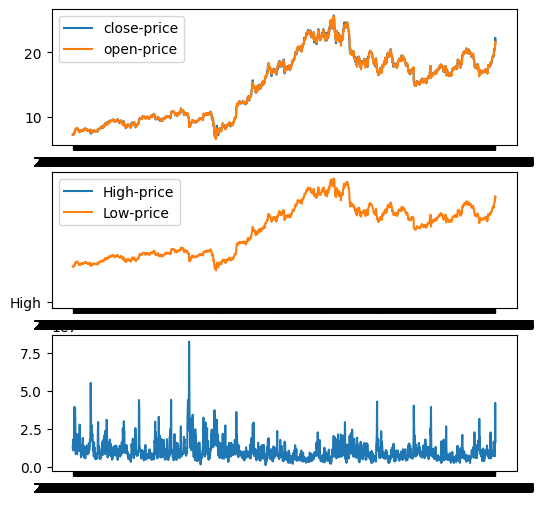

In [ ]:
plt.figure(2,(6,6))
plt.subplot(3,1,1)
plt.plot(Tsla_data['Close'],label='close-price')
plt.plot(Tsla_data['Open'],label='open-price')
plt.legend()

plt.subplot(3,1,2)
plt.plot(['High'],label='High-price')
plt.plot(Tsla_data['Low'],label='Low-price')
plt.legend()
plt.subplot(3,1,3)
plt.plot(Tsla_data['Volume'],label='Volumne')



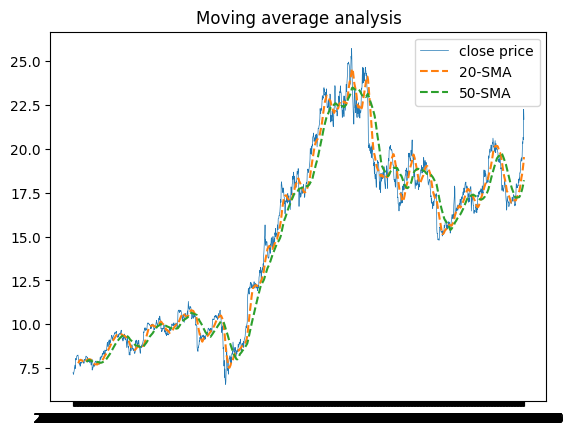

In [ ]:
# calulate the moving average
Tsla_data['SMA_20'] = Tsla_data['Close'].rolling(20).mean()
Tsla_data['SMA_50'] = Tsla_data['Close'].rolling(50).mean()
plt.figure(1)
plt.plot(Tsla_data['Close'],label='close price',linewidth=0.5)
plt.plot(Tsla_data['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(Tsla_data['SMA_50'],label='50-SMA',linestyle='--')

plt.title('Moving average analysis')
plt.legend()




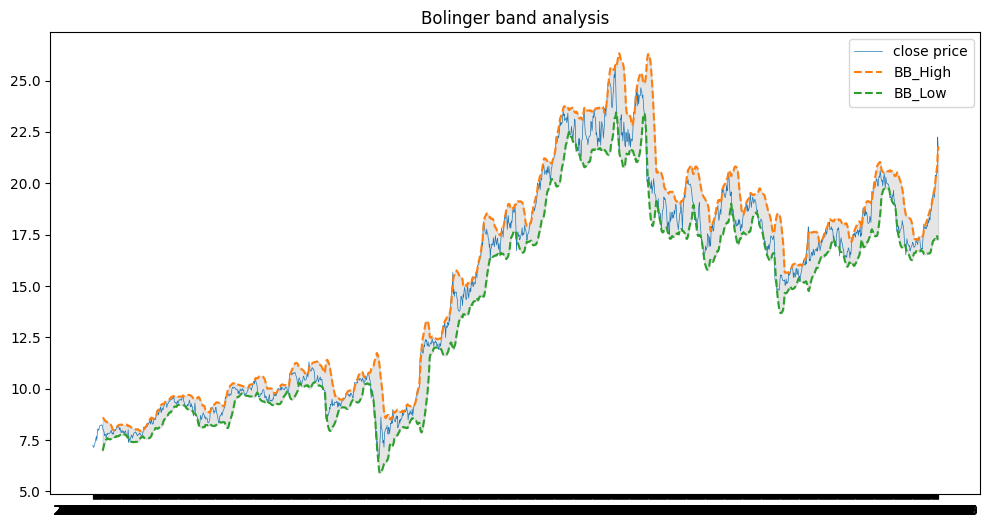

In [ ]:
import ta
# bollinger band
bb = ta.volatility.BollingerBands(INFO_data['Close'],window=20,window_dev=2)

INFO_data['BB_High']=bb.bollinger_hband()
INFO_data['BB_Low']=bb.bollinger_lband()
plt.figure(1,(12,6))
plt.plot(INFO_data['Close'],label='close price',linewidth=0.5)
plt.plot(INFO_data['BB_High'],label='BB_High',linestyle='--')
plt.plot(INFO_data['BB_Low'],label='BB_Low',linestyle='--')
plt.fill_between(INFO_data.index,INFO_data['BB_High'],
                 INFO_data['BB_Low'],color = 'gray',alpha=0.2)
plt.title('Bolinger band analysis')
plt.legend()

# if the descreasing morality preceding a period of low modelit

# if the increasing morality preceding a period of high model it

# if the blue bond touch the higher bound then it will come low

# if the blue bond touch the lower bound the price come to high



,Unnamed: 0,Symbols,Close,High,Low,Open,Volume,BB_High,BB_Low,RSI
Date,,,,,,,,,,
2024-07-15,4,INFY,20.31,20.41,20.17,20.17,11641712.0,20.443527,17.304473,79.624385
2024-07-16,3,INFY,20.66,20.66,20.47,20.51,7137487.0,20.686031,17.348969,82.055020
2024-07-17,2,INFY,20.53,20.68,20.46,20.54,14389190.0,20.862297,17.431703,78.317957
2024-07-18,1,INFY,22.25,22.61,21.52,21.66,42176088.0,21.455310,17.272690,86.850808
2024-07-19,0,INFY,21.68,21.87,21.31,21.31,16443577.0,21.790758,17.278242,76.154787


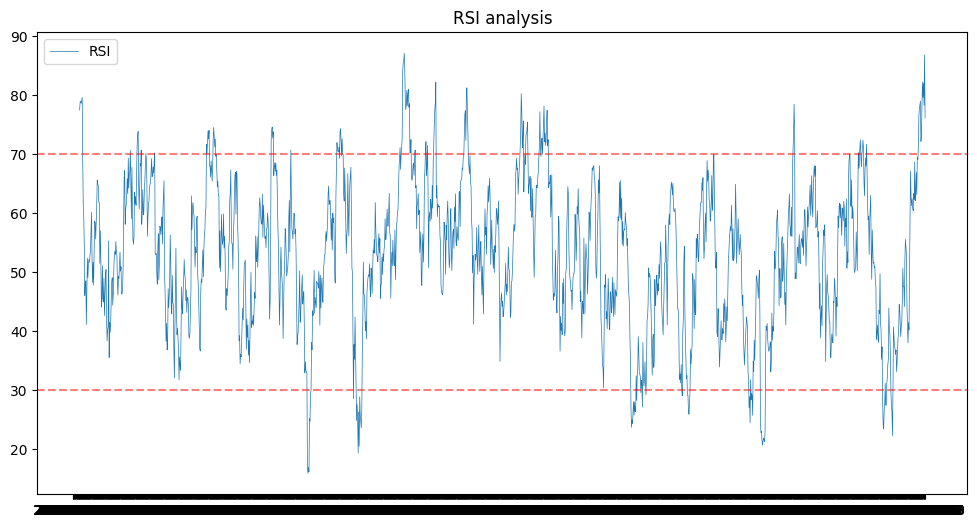

In [ ]:
# relative strength index
INFO_data['RSI'] = ta.momentum.rsi(INFO_data['Close'],window=14)

plt.figure(1,(12,6))
plt.plot(Tsla_data['RSI'],label='RSI',linewidth=0.5) # Use Tsla_data here to access RSI values
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(30,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend()
INFO_data.tail()
# relative strength index


In [ ]:

INFO_data.to_csv('Info_Data_Stock_Price_2018_to_2024_indicator.csv')

HSBC


In [ ]:
import pandas_datareader as pdr
import datetime
import pandas as pd

start = datetime.datetime(2018,1,1)
end = datetime.datetime(2024,7,20)

print(start)
print(end)

2018-01-01 00:00:00
2024-07-20 00:00:00


In [ ]:
stock = ['HSBC']
data = pdr.DataReader(stock,'stooq',str(start.date()),str(end.date())).stack('Symbols')
data.head()

,Attributes,Close,High,Low,Open,Volume
Date,Symbols,,,,,
2024-07-19,HSBC,42.86,43.100,42.71,42.78,1526964.0
2024-07-18,HSBC,43.02,43.590,42.94,43.54,1078915.0
2024-07-17,HSBC,43.50,43.675,43.44,43.55,1140629.0
2024-07-16,HSBC,43.53,43.550,42.89,43.00,1012050.0
2024-07-15,HSBC,43.25,43.510,43.17,43.34,1830722.0


In [ ]:
newData = data.reset_index()
newData.head()

Attributes,Date,Symbols,Close,High,Low,Open,Volume
0,2024-07-19,HSBC,42.86,43.100,42.71,42.78,1526964.0
1,2024-07-18,HSBC,43.02,43.590,42.94,43.54,1078915.0
2,2024-07-17,HSBC,43.50,43.675,43.44,43.55,1140629.0
3,2024-07-16,HSBC,43.53,43.550,42.89,43.00,1012050.0
4,2024-07-15,HSBC,43.25,43.510,43.17,43.34,1830722.0


In [ ]:
newData.to_csv('HSBC_stock_2018_to_2024.csv')

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume,RSI,SMA_20,SMA_50
Date,,,,,,,,,,
2018-01-02,1646,INFY,7.24550,7.28987,7.21909,7.23676,1.382488e+07,NaN,NaN,NaN
2018-01-03,1645,INFY,7.18336,7.23676,7.16087,7.22341,1.152342e+07,NaN,NaN,NaN
2018-01-04,1644,INFY,7.13869,7.20563,7.12544,7.20563,1.829198e+07,NaN,NaN,NaN
2018-01-05,1643,INFY,7.27210,7.28556,7.18336,7.19209,1.102944e+07,NaN,NaN,NaN
2018-01-08,1642,INFY,7.33012,7.34789,7.26778,7.28556,1.258842e+07,NaN,NaN,NaN


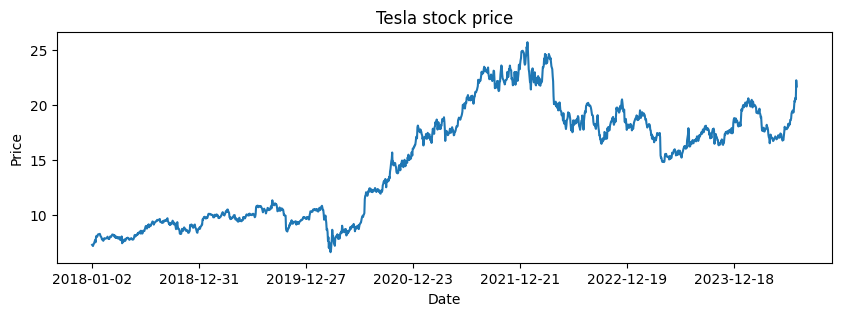

In [ ]:
import matplotlib.pyplot as plt
# plot the close price fo the tesla stock
# load the csv file
HSBC_data = pd.read_csv('/content/HSBC_stock_2018_to_2024.csv')

# set the date as the index
HSBC_data.set_index('Date',inplace=True)
# sort the data into ascending order wrt dates
HSBC_data.sort_index(ascending=True,inplace=True)


# and then sperate the close price
close_price = HSBC_data['Close']
# then plot the close price
close_price.plot(xlabel='Date',ylabel='Price',label='Tsla',title=
                'Tesla stock price',figsize=(10,3))

Tsla_data.head()

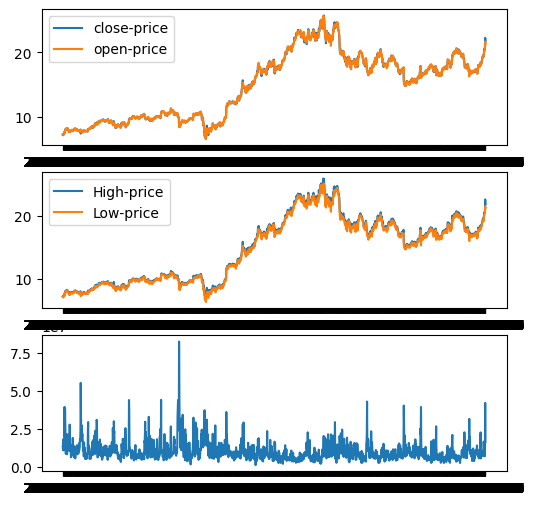

In [ ]:
plt.figure(2,(6,6))
plt.subplot(3,1,1)
plt.plot(HSBC_data['Close'],label='close-price')
plt.plot(HSBC_data['Open'],label='open-price')
plt.legend()

plt.subplot(3,1,2)
plt.plot(HSBC_data['High'],label='High-price')
plt.plot(HSBC_data['Low'],label='Low-price')
plt.legend()
plt.subplot(3,1,3)
plt.plot(HSBC_data['Volume'],label='Volumne')



In [ ]:
# moving average

HSBC_data.head()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume
Date,,,,,,,
2018-01-02,1646,INFY,7.24550,7.28987,7.21909,7.23676,1.382488e+07
2018-01-03,1645,INFY,7.18336,7.23676,7.16087,7.22341,1.152342e+07
2018-01-04,1644,INFY,7.13869,7.20563,7.12544,7.20563,1.829198e+07
2018-01-05,1643,INFY,7.27210,7.28556,7.18336,7.19209,1.102944e+07
2018-01-08,1642,INFY,7.33012,7.34789,7.26778,7.28556,1.258842e+07


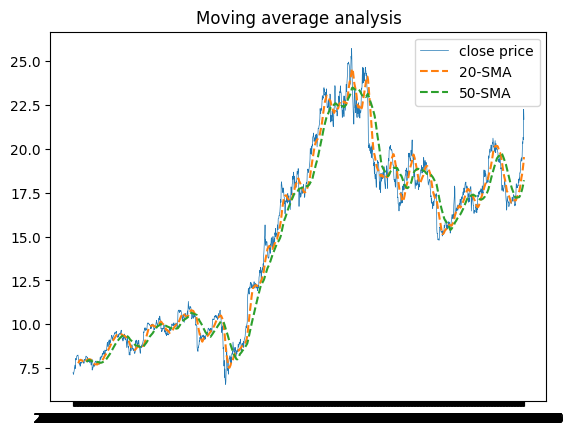

In [ ]:
# calulate the moving average
HSBC_data['SMA_20'] = HSBC_data['Close'].rolling(20).mean()
HSBC_data['SMA_50'] = HSBC_data['Close'].rolling(50).mean()
plt.figure(1)
plt.plot(HSBC_data['Close'],label='close price',linewidth=0.5)
plt.plot(HSBC_data['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(HSBC_data['SMA_50'],label='50-SMA',linestyle='--')

plt.title('Moving average analysis')
plt.legend()




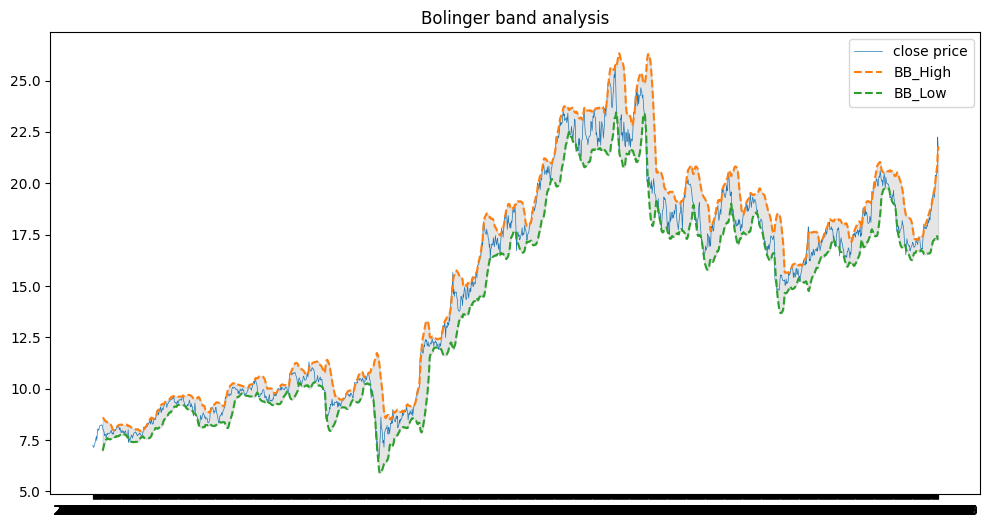

In [ ]:
import ta
# bollinger band
bb = ta.volatility.BollingerBands(HSBC_data['Close'],window=20,window_dev=2)

HSBC_data['BB_High']=bb.bollinger_hband()
HSBC_data['BB_Low']=bb.bollinger_lband()
plt.figure(1,(12,6))
plt.plot(HSBC_data['Close'],label='close price',linewidth=0.5)
plt.plot(HSBC_data['BB_High'],label='BB_High',linestyle='--')
plt.plot(HSBC_data['BB_Low'],label='BB_Low',linestyle='--')
plt.fill_between(HSBC_data.index,HSBC_data['BB_High'],
                 HSBC_data['BB_Low'],color = 'gray',alpha=0.2)
plt.title('Bolinger band analysis')
plt.legend()



,Unnamed: 0,Symbols,Close,High,Low,Open,Volume,RSI,SMA_20,SMA_50
Date,,,,,,,,,,
2024-07-15,4,INFY,20.31,20.41,20.17,20.17,11641712.0,79.624385,18.8740,17.8678
2024-07-16,3,INFY,20.66,20.66,20.47,20.51,7137487.0,82.055020,19.0175,17.9436
2024-07-17,2,INFY,20.53,20.68,20.46,20.54,14389190.0,78.317957,19.1470,18.0156
2024-07-18,1,INFY,22.25,22.61,21.52,21.66,42176088.0,86.850808,19.3640,18.1212
2024-07-19,0,INFY,21.68,21.87,21.31,21.31,16443577.0,76.154787,19.5345,18.2122


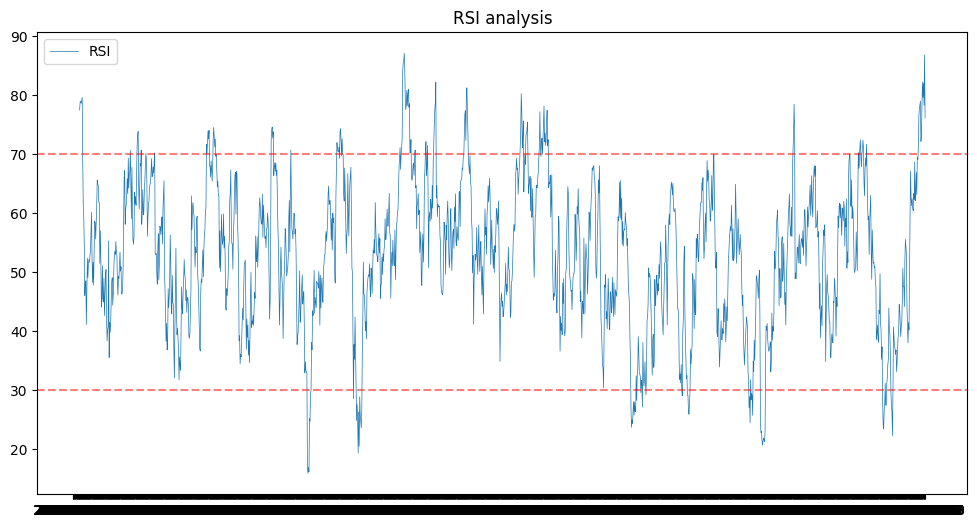

In [ ]:
# relative strength index
HSBC_data['RSI'] = ta.momentum.rsi(HSBC_data['Close'],window=14)

plt.figure(1,(12,6))
plt.plot(HSBC_data['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(30,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend()
Tsla_data.tail()

In [ ]:

HSBC_data.to_csv('newHSBC_stock_2018_to_2024_with.csv')

BY FUNCTION

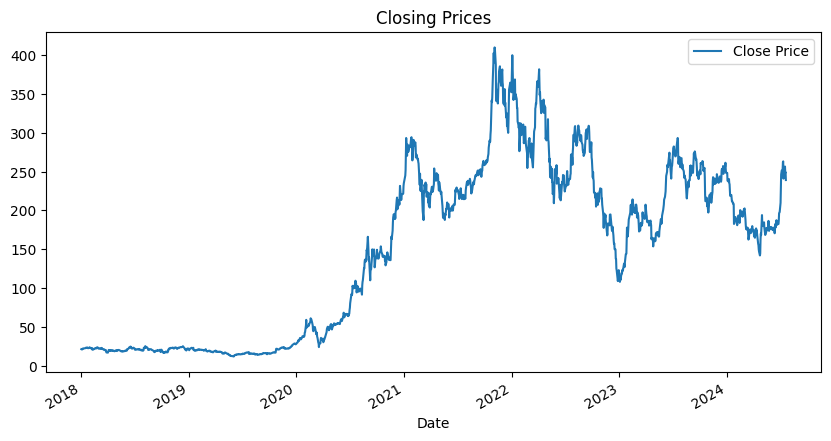

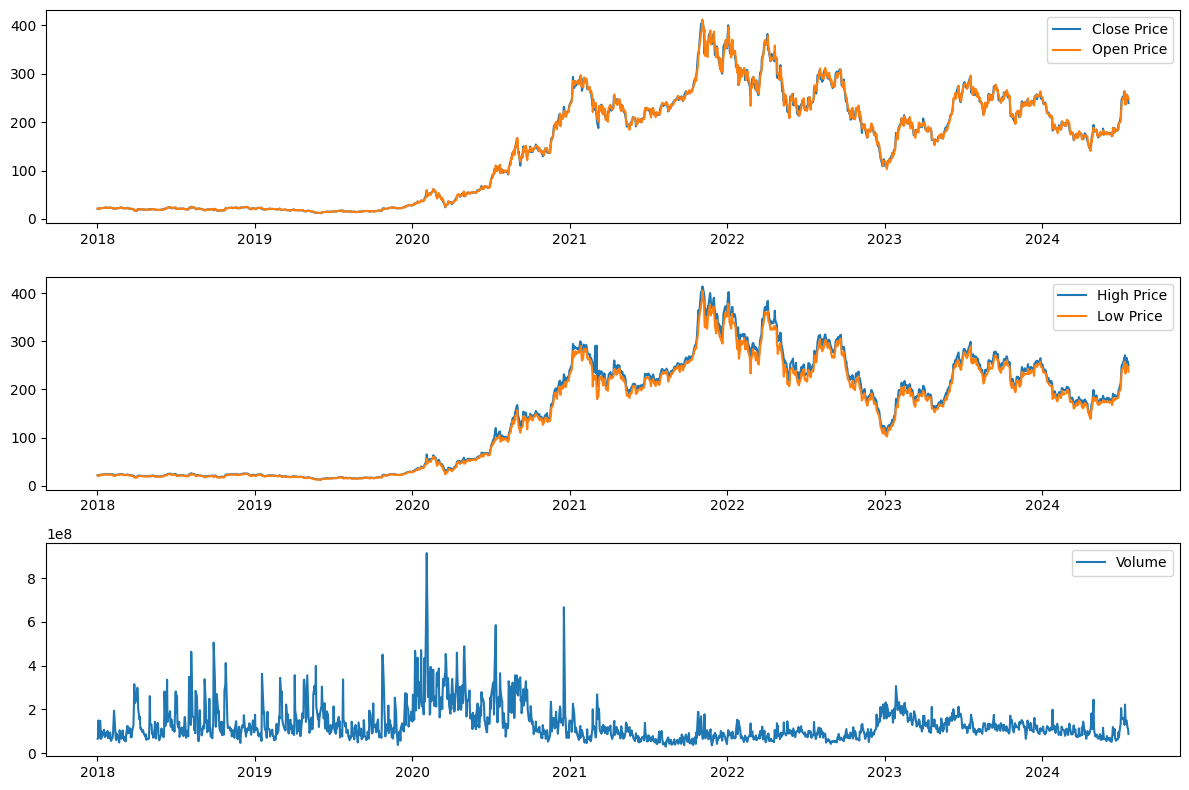

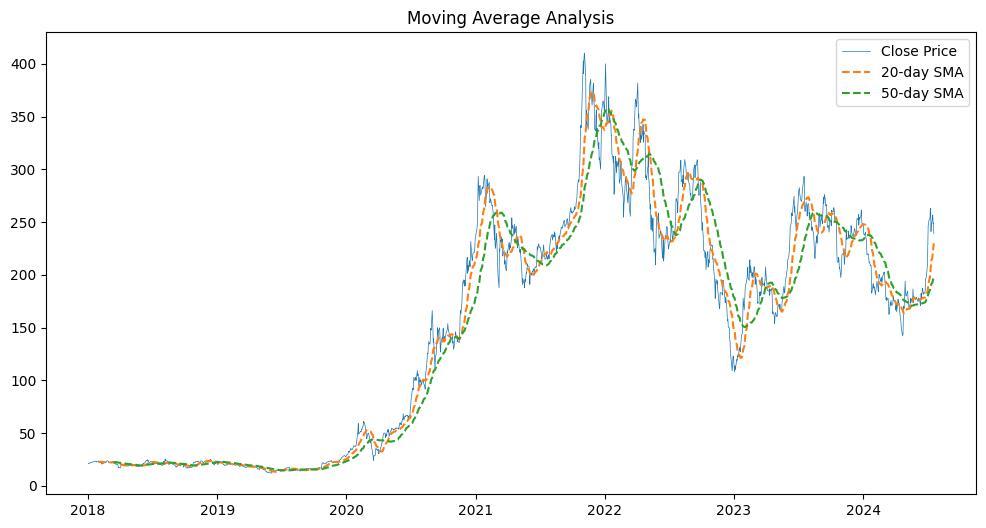

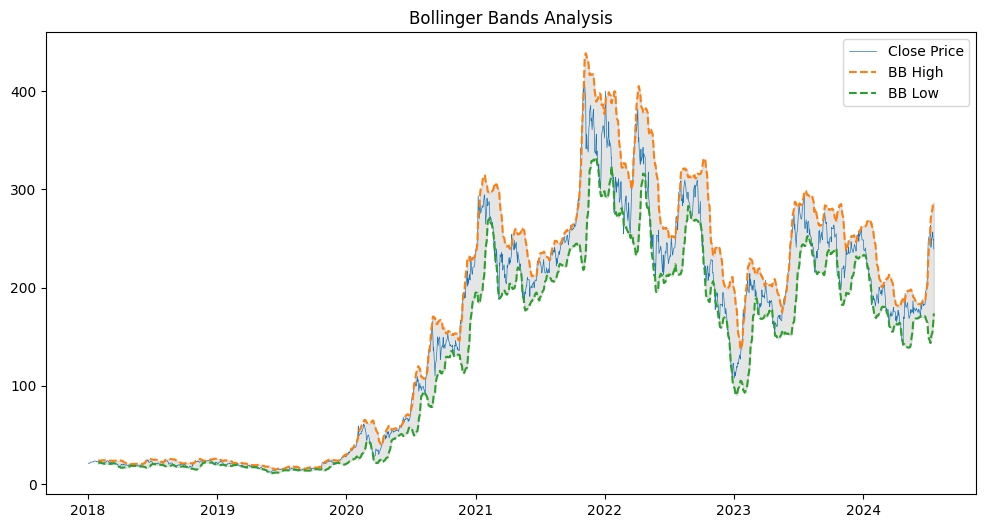

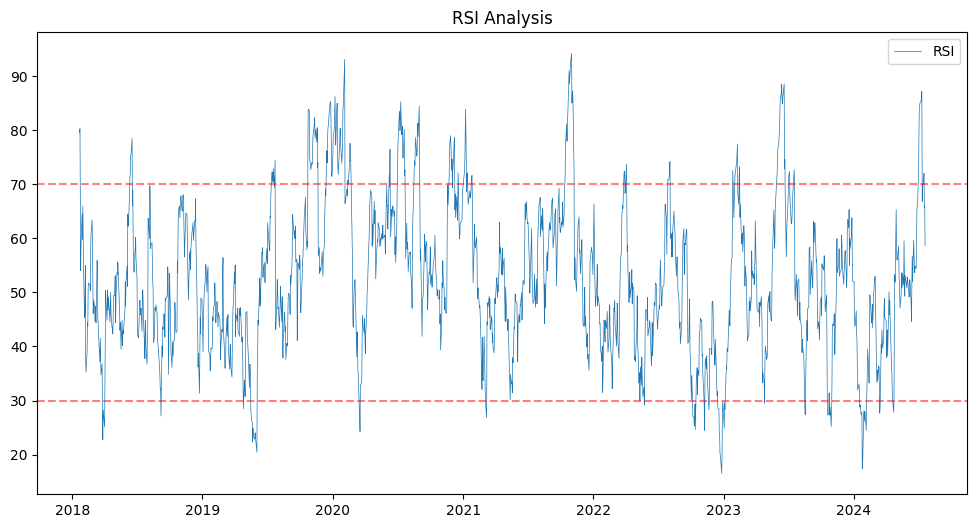

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ta

def analyze_stock_data(stock_data_file):
    # Read CSV file into DataFrame
    Comp_name = pd.read_csv(stock_data_file)

    # Set 'Date' column as index and sort by date
    Comp_name['Date'] = pd.to_datetime(Comp_name['Date'])
    Comp_name.set_index('Date', inplace=True)
    Comp_name.sort_index(ascending=True, inplace=True)

    # Plot 1: Closing Prices
    plt.figure(figsize=(10, 5))
    Comp_name['Close'].plot(label='Close Price')
    plt.title('Closing Prices')
    plt.legend()
    plt.show()

    # Plot 2: Multiple subplots for open, high, low, volume
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(Comp_name['Close'], label='Close Price')
    plt.plot(Comp_name['Open'], label='Open Price')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(Comp_name['High'], label='High Price')
    plt.plot(Comp_name['Low'], label='Low Price')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(Comp_name['Volume'], label='Volume')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Calculate moving averages
    Comp_name['SMA_20'] = Comp_name['Close'].rolling(20).mean()
    Comp_name['SMA_50'] = Comp_name['Close'].rolling(50).mean()

    # Plot moving averages
    plt.figure(figsize=(12, 6))
    plt.plot(Comp_name['Close'], label='Close Price', linewidth=0.5)
    plt.plot(Comp_name['SMA_20'], label='20-day SMA', linestyle='--')
    plt.plot(Comp_name['SMA_50'], label='50-day SMA', linestyle='--')
    plt.title('Moving Average Analysis')
    plt.legend()
    plt.show()

    # Calculate Bollinger Bands
    bb = ta.volatility.BollingerBands(Comp_name['Close'], window=20, window_dev=2)
    Comp_name['BB_High'] = bb.bollinger_hband()
    Comp_name['BB_Low'] = bb.bollinger_lband()

    # Plot Bollinger Bands
    plt.figure(figsize=(12, 6))
    plt.plot(Comp_name['Close'], label='Close Price', linewidth=0.5)
    plt.plot(Comp_name['BB_High'], label='BB High', linestyle='--')
    plt.plot(Comp_name['BB_Low'], label='BB Low', linestyle='--')
    plt.fill_between(Comp_name.index, Comp_name['BB_High'], Comp_name['BB_Low'], color='gray', alpha=0.2)
    plt.title('Bollinger Bands Analysis')
    plt.legend()
    plt.show()

    # Calculate RSI
    Comp_name['RSI'] = ta.momentum.rsi(Comp_name['Close'], window=14)

    # Plot RSI
    plt.figure(figsize=(12, 6))
    plt.plot(Comp_name['RSI'], label='RSI', linewidth=0.5)
    plt.axhline(70, linestyle='--', color='red', alpha=0.5)
    plt.axhline(30, linestyle='--', color='red', alpha=0.5)
    plt.title('RSI Analysis')
    plt.legend()
    plt.show()


while True:
  choice = input("Enter your choice (GM,INFY,TSLA): ")


  if choice == 'INFY' or choice== 'infy':
    analyze_stock_data('/content/infosis_Stock_2018to_2024')  # Assuming the file is available
  elif choice == 'TSLA'or choice== 'tesla':
    analyze_stock_data('/content/Tesla_Stock_2018to_2024')  # Assuming the file is available
  else:
    print("Invalid choice. Please try again.")
    break


